In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Understanding Data

## (or, lies I've been told about statistics)

#### Version 0.1

-----

By AA Miller (Northwestern/Adler Planetarium)

5 Sep 2019

According to the [DSFP curriculum](https://astrodatascience.org/curriculum), this entire week is going to be devoted to statistics (a topic which is, an entire field unto itself). 

In practice, however, statistics is too big a topic to fully tackle in a week. 

A more apt description for this week's theme is **models**, and this is a good thing, because everything in astronomy is a model (more on this in just a bit).

Broadly speaking, we build models for two purposes:

*forecasting*

and

*inference*.

Forecasting is about predicting the outcome of some future, as of yet, unobserved event. 

This can be extremely useful if you have measured the velocity dispersion of some galaxy and you would like to know the mass of the black hole at the center of that galaxy.

(*aside* –– machine learning is essentially all about forecasting)

Inference is about understanding the fundamental relationship between different parameters. Inference can be used for forecasting (the otherway around isn't always true). 

Inference is necessary for understanding physics. While the following statement can be incredibly useful, "based on 10 measurements of a force applied to this ball, I predict that a newly applied force, $F_\mathrm{new}$, will produce acceleration $F_\mathrm{new}/m_\mathrm{ball}$," it is far more useful to say $F = ma$ for any object with mass $m$.

(*aside* –– machine learning is not useful for inference)

Before we start any discussion of models, we need to back up and zoom out a bit, because models require...

## Problem 1) Data

At the core of everything we hope to accomplish with the DSFP stands a single common connection: data.

Using a vast array of telescopes across the planet and in outter space we are able to collect data that allow us to unravel the mysteries of the universe!

This naturally leads to the question:

**Problem 1a**

What is data?

*Take a few min to discuss this with your partner*

**Solution 1a**

While we just discussed several different ideas about the nature of data, the main thing I want to emphasize is the following: data are *constants*.

Hypothetical question –– what if a data reduction pipeline changes (for the better), and, as a result the endproducts (i.e. data output) have changed? 

Doesn't this mean that the data have changed?

This is a subtle point, but, in this case the data have not changed. The output from the pipeline, which we often think of as "data," is actually a *model*. Adjustments in the pipeline result in changes in the model, and any downstream analysis changes because the model has changed.

Models vary, data don't.

To clearly reiterate this point: imagine you want to determine the "turn-off" age for an open cluster. To do this, you would need to know the flux of each star in the cluster, which could then be compared to stellar evolution models.

But wait!

The stellar fluxes are themselves a model. Before LSST can report some flux plus or minus some uncertainty in a database, the project has to do the following: bias-subtract the raw CCD image (model #1), flat-field correct the bias-subtracted image (model #2), identify the pixel location of all the stars in the image (model #3), align the relative pixel-positions with a standard astrometric reference frame (model #4), determine the relative flux of every star and galaxy in the image (model #5), and convert those relative fluxes to absolute values by identifying "standard" stars with known absolute flux to calibrate the relative flux measurements (model #6).

So really, the flux of a star, which we would normally refer to as a data point for the stellar evolution model, is in fact a model of several models.

This brings us back to the earlier claim: everything in astronomy is models. (it's models all the way down...)

This should also make you a little nervous –– have the uncertainties been properly estimated for each of those models, and if they have, have they been propagated to the final numbers that are available in the database?

## Problem 2) Linear Models and Least-Squares Fitting

Execute the cell below in order to populate your namespace with some data that we will use for the subsequent analysis.

In [14]:
# from ____ import ____
x, y, y_unc = polute_namespace()

You now have some data $x$ and $y$ (ignore all the other data for now). 

## Problem 2) Lies, Damned Lies, and Statistics

**Lie #1**

For a 2-dimensional data set with one dependent variable (i.e. $y$ depends on $x$) and $n$ observations, a polynomial of the $n^\mathrm{th}$ degree can "perfectly" fit the data? 

**Lie #2**

The model that minimizes the $\chi^2$ is best.

(or a slightly more nuanced version of this statement - the model where the $\chi^2$ per degree of freedom is closest to 1 is best)

**Lie #3**

You cannot fit a model with more free parameters than there are data points.

## Helper Functions

In [9]:
def pollute_namespace():

    np.random.seed(212)

    x = np.random.uniform(0,1000,56)
    sigma = 150
    y = 1.75*x + 41 + np.random.normal(0,sigma,len(x))
    y_unc = sigma*np.ones_like(x)
    
    return x, y, y_unc

In [11]:
x, y, y_unc = polute_namespace()

<IPython.core.display.Javascript object>


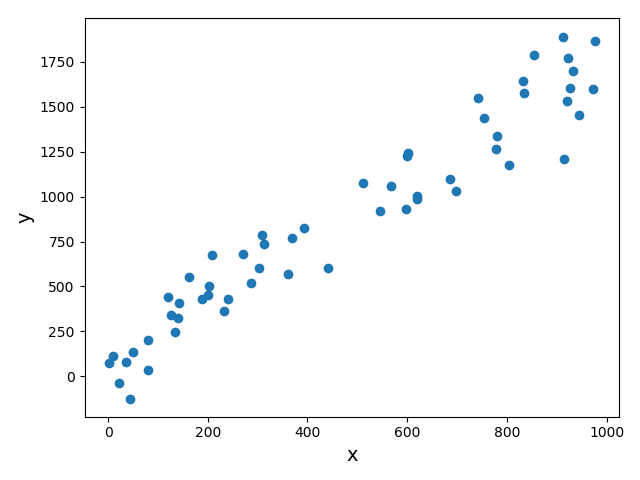

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.tight_layout()

<IPython.core.display.Javascript object>


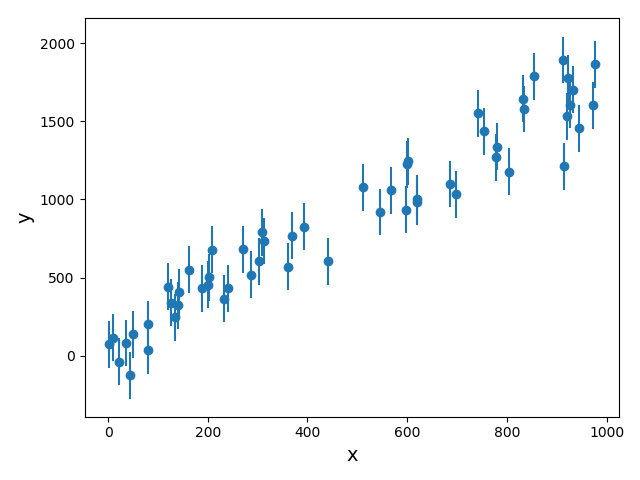

In [13]:
fig, ax = plt.subplots()
ax.errorbar(x, y, y_unc, fmt='o')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.tight_layout()